In [126]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [127]:
data = pd.read_csv("./talking_data.csv")

In [128]:
data = data.drop(['attributed_time'],axis =1)
data = data.drop(['click_time'],axis =1)

In [129]:
data.head()

,ip,app,device,os,channel,is_attributed
0,87540,12,1,13,497,0
1,105560,25,1,17,259,0
2,101424,12,1,19,212,0
3,94584,13,1,13,477,0
4,68413,12,1,1,178,0


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ip             100000 non-null  int64
 1   app            100000 non-null  int64
 2   device         100000 non-null  int64
 3   os             100000 non-null  int64
 4   channel        100000 non-null  int64
 5   is_attributed  100000 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [131]:
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [132]:
miss_val = data.isna().sum()
miss_val

ip               0
app              0
device           0
os               0
channel          0
is_attributed    0
dtype: int64

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ip             100000 non-null  int64
 1   app            100000 non-null  int64
 2   device         100000 non-null  int64
 3   os             100000 non-null  int64
 4   channel        100000 non-null  int64
 5   is_attributed  100000 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [134]:
data_ct = data.select_dtypes(include='object')
data_ct.head()

""
0
1
2
3
4


In [135]:
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,ip,app,device,os,channel,is_attributed
0,87540,12,1,13,497,0
1,105560,25,1,17,259,0
2,101424,12,1,19,212,0
3,94584,13,1,13,477,0
4,68413,12,1,1,178,0


In [136]:
data.is_attributed.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

Text(0.5, 1.0, 'is_attributed')

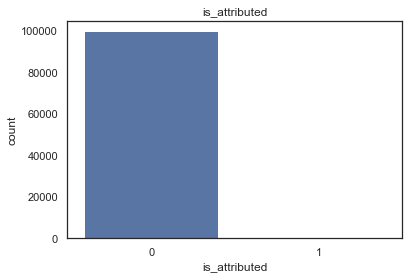

In [137]:
sns.countplot('is_attributed',data = data)
plt.title("is_attributed")

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['is_attributed']= label_encoder.fit_transform(data['is_attributed'])


In [138]:
data['is_attributed'].unique()

array([0, 1], dtype=int64)

In [139]:
data.head()

,ip,app,device,os,channel,is_attributed
0,87540,12,1,13,497,0
1,105560,25,1,17,259,0
2,101424,12,1,19,212,0
3,94584,13,1,13,477,0
4,68413,12,1,1,178,0


In [140]:
corr = data.corr()
corr

,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000


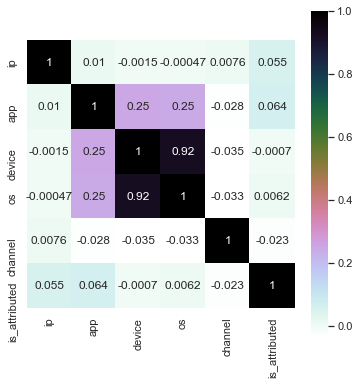

In [141]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [142]:
abs(corr['is_attributed'])[:-1].sort_values(ascending = False)

app        0.064426
ip         0.054955
channel    0.023336
os         0.006183
device     0.000695
Name: is_attributed, dtype: float64

In [143]:
data_train = data[:1460]
data_test = data[1460:]

In [144]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30)

In [145]:
train_x = train.drop(['is_attributed'], axis = 1)
train_y = train['is_attributed']             

test_x = test.drop(['is_attributed'],axis = 1)
test_y = test['is_attributed']

In [146]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (70000, 5)
Dimension of train_y : (70000,)
Dimension of test_x : (30000, 5)
Dimension of test_y : (30000,)


In [147]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="gini")
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [148]:
pred = clf.predict(test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the Decision Tree is 99.74%


In [150]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")
clf1.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [151]:
pred1 = clf1.predict(test_x)
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [152]:
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred1,test_y)*100,2)))

The accuracy of the Decision Tree is 99.74%
